In [26]:
from jazzy.api import molecular_vector_from_smiles, atomic_map_from_smiles
import pandas as pd
import numpy as np
from rdkit.Chem import MolFromSmiles as mfs
from rdkit.Chem.Draw import MolToFile as mtf
import os
import sys
from project_resources.import_utils import NotebookFinder
sys.meta_path.append(NotebookFinder())
from project_resources.cytochrome_P450 import *

importing Jupyter notebook from C:\Users\Lukas\Documents\Jupyter_Notebooks\project_resources\cytochrome_P450.ipynb


In [2]:
isozymes = ["3A4", "RLM", "HLC"]
rel_paths = {
    "3A4_source": r"project_resources/ChEMBL_3A4.csv",
    "3A4_sep": ";",
    "3A4": r"project_resources/3A4.csv",
    "3A4_jazzy_mol_fts": r"project_resources/3A4_jazzy_mol_fts.csv",

    "RLM_source": r"project_resources/AID_1508591_datatable_all.csv",
    "RLM_sep": ",",
    "RLM": r"project_resources/RLM.csv",
    "RLM_jazzy_mol_fts": r"project_resources/RLM_jazzy_mol_fts.csv",

    "HLC_source": r"project_resources/AID_1508603_datatable_all.csv",
    "HLC_sep": ",",
    "HLC": r"project_resources/HLC.csv",
    "HLC_jazzy_mol_fts": r"project_resources/HLC_jazzy_mol_fts.csv",
}
mol_features = {}
atom_features = {}

In [3]:
def abs_file_path(rel_path):
    working_dir = os.getcwd()
    abs_file_path = os.path.join(working_dir, rel_path.replace("\\", "/"))
    return abs_file_path

In [4]:
mol_vect = molecular_vector_from_smiles
at_map = atomic_map_from_smiles

In [5]:
# JazzyError:
# Jazzy ERROR: [14:07:25] The RDKit embedding has failed for the molecule: C[C@@H]1CC[C@H]2[C@H]([C@H](O[C@H]3[C@@]24[C@@H]1CC[C@@](O3)(OO4)C)CC(=NOCC=C)[C@@H]5[C@H]([C@@H]6CC[C@H]([C@H]7[C@]68[C@H](O5)O[C@](CC7)(OO8)C)C)C)C
# Jazzy ERROR: [14:07:45] The RDKit embedding has failed for the molecule: C[C@@H]1CC[C@H]2[C@H]([C@H](O[C@H]3[C@@]24[C@@H]1CC[C@@](O3)(OO4)C)CC(C[C@@H]5[C@H]([C@@H]6CC[C@H]([C@H]7[C@]68[C@H](O5)O[C@](CC7)(OO8)C)C)C)C(=O)NCC9=CC=C(C=C9)F)C
# Jazzy ERROR: [14:23:49] The RDKit embedding has failed for the molecule: C[C@@H]1CC[C@H]2[C@@H]([C@H](O[C@H]3[C@@]24[C@H]1CC[C@@](O3)(OO4)C)CCC(=O)NC5=CC(=CC=C5)SC)C
# Jazzy ERROR: [14:24:18] The RDKit embedding has failed for the molecule: C[C@@H]1CC[C@H]2[C@H]([C@H](O[C@H]3[C@@]24[C@@H]1CC[C@@](O3)(OO4)C)CCC(=O)NC5=CC=C(C=C5)F)C

# ještě nastaly další warningy:
# ...\site-packages\kallisto\methods.py:199: RuntimeWarning: invalid value encountered in scalar divide
#      A[j][i] = special.erf(gamij * r) / r
#           molekula, která toto způsobila: CC1=CC(=C2C=C(C=CC2=N1)NC(=O)NC3=CC4=C(C=C(N=C4C=C3)C)N)N.Cl.Cl
# ...\site-packages\kallisto\methods.py:289: RuntimeWarning: divide by zero encountered in scalar divide
#      norm = 1.0 / norm
# ...\site-packages\kallisto\methods.py:294: RuntimeWarning: invalid value encountered in scalar multiply
#      gw[k] += cngw(twf, covcn[i], refcn[ii][ia]) * norm
#           molekula, která způsobila jak tento warning, tak ten uprostřed: C1CN(CCC1C(=O)N)C2=NC(=CS2)C3=CC(=CC=C3)F

# a v neposlední řadě UFFTYPER: Unrecognized charge state for atom:
# CC1=CC(=NO1)NS(=O)(=O)C2=CC=C(C=C2)NC(=O)CC3=CC(=C(C=C3)F)Cl -> UFFTYPER: Unrecognized charge state for atom: 7
# C[S+](=O)(C1=CC=C(C=C1)C2=C3C=NC=CN3C(=N2)C(=O)N4CCOCC4)[O-] -> UFFTYPER: Unrecognized charge state for atom: 1     UFFTYPER: Unrecognized charge state for atom: 23
# C1CN(CCN1CC2=CC=CC=C2)C(=O)[C@H](CC3=CC=C(C=C3)O[S+](=O)(C4=CC=CC5=C4C=CN=C5)[O-])N[S+](=O)(C6=CC=CC7=C6C=CN=C7)[O-] -> UFFTYPER: Unrecognized charge state for atom: 24     UFFTYPER: Unrecognized charge state for atom: 38

# atomic_map_from_smiles způsobí stejné errory, u stejných molekul

In [6]:
def mol_fts(smiles, isozyme):
    df = pd.read_csv(rel_paths[isozyme])
    smiles = df["smiles"]
    features = []
    for smi in smiles:
        try:
            features.append(mol_vect(smi))
        except:
            # nepřišel jsem na to, jak zachytit ten JazzyError - protože mi to napíše NameError: name 'JazzyError' is not defined
            features.append(np.nan)
    return features

In [23]:
for isozyme in isozymes:
    df = pd.read_csv(rel_paths[isozyme])
    smiles = df["smiles"]
    features = []
    for smi in smiles:
        try:
            features.append(at_map(smi, minimisation_method="MMFF94"))
        except:
            features.append(np.nan)
    atom_features[isozyme] = features

C:\Users\Lukas\AppData\Roaming\Python\Python311\site-packages\kallisto\methods.py:199: RuntimeWarning: invalid value encountered in scalar divide
  A[j][i] = special.erf(gamij * r) / r
[21:49:44] UFFTYPER: Unrecognized charge state for atom: 7
[21:49:55] UFFTYPER: Unrecognized charge state for atom: 18
[21:49:57] UFFTYPER: Unrecognized charge state for atom: 16
[21:49:57] UFFTYPER: Unrecognized charge state for atom: 17
[21:50:00] UFFTYPER: Unrecognized charge state for atom: 18
[21:50:02] UFFTYPER: Unrecognized charge state for atom: 17
[21:50:04] UFFTYPER: Unrecognized charge state for atom: 13
[21:50:04] UFFTYPER: Unrecognized charge state for atom: 13
[21:50:04] UFFTYPER: Unrecognized charge state for atom: 13
[21:50:05] UFFTYPER: Unrecognized charge state for atom: 14
[21:50:05] UFFTYPER: Unrecognized charge state for atom: 14
[21:50:05] UFFTYPER: Unrecognized charge state for atom: 13
[21:50:06] UFFTYPER: Unrecognized charge state for atom: 13
[21:50:07] UFFTYPER: Unrecognized ch

In [18]:
for isozyme in isozymes:
    print(isozyme)
    try:
        mol_fts_df = pd.read_csv(rel_paths[f"{isozyme}_jazzy_mol_fts"])
        features = list(mol_fts_df.columns)
        features.remove("smiles")
        print(features)
        isozyme_fts = []
        for i in range(len(mol_fts_df["smiles"])):
            smiles_fts = {}
            for feature in features:
                smiles_fts[feature] = mol_fts_df[feature][i]
            isozyme_fts.append(smiles_fts)
        mol_features[isozyme] = isozyme_fts
        print(mol_features[isozyme][0:2])
    except FileNotFoundError:
        df = pd.read_csv(rel_paths[isozyme])
        smiles = df["smiles"]
        # load smiles for isozyme
        mol_features[isozyme] = mol_fts(smiles, isozyme)
        # calculate molecule features for list of smiles
        mol_fts_df = pd.DataFrame()
        mol_fts_df["smiles"] = smiles
        # create new df with the first column being smiles from the given isozyme
        features = [feature for feature in mol_features[isozyme][0]]
        # list of possible molecule features
        for feature in features:
            single_feature_list = []
            for i in range(len(mol_features[isozyme])):
                if mol_features[isozyme][i] == mol_features[isozyme][i]:
                    single_feature_list.append(mol_features[isozyme][i][feature])
                else:
                    single_feature_list.append(np.nan)
            mol_fts_df[feature] = single_feature_list
        # write the value of a given feature for each molecule into df
        mol_fts_df.to_csv(abs_file_path(rel_paths[f"{isozyme}_jazzy_mol_fts"]), index=False)
        # create final csv

3A4
['sdc', 'sdx', 'sa', 'dga', 'dgp', 'dgtot']
[{'sdc': 6.9114, 'sdx': 1.1972, 'sa': 3.4065, 'dga': -5.028, 'dgp': -67.7113, 'dgtot': -72.7393}, {'sdc': 16.8081, 'sdx': 0.608, 'sa': 7.5495, 'dga': -10.882, 'dgp': -153.8596, 'dgtot': -135.4269}]
RLM
['sdc', 'sdx', 'sa', 'dga', 'dgp', 'dgtot']
[{'sdc': 5.9606, 'sdx': 1.7203, 'sa': 2.9233, 'dga': 2.3403, 'dgp': -62.5586, 'dgtot': -60.2183}, {'sdc': 7.2935, 'sdx': 2.1751, 'sa': 4.7052, 'dga': -5.366, 'dgp': -92.3442, 'dgtot': -92.2883}]
HLC
['sdc', 'sdx', 'sa', 'dga', 'dgp', 'dgtot']
[{'sdc': 8.1842, 'sdx': 0.767, 'sa': 3.7903, 'dga': -16.3222, 'dgp': -76.5154, 'dgtot': -85.8172}, {'sdc': 7.8084, 'sdx': 0.0, 'sa': 2.1929, 'dga': -6.1343, 'dgp': -49.0782, 'dgtot': -55.2125}]


In [24]:
for isozyme in isozymes:
    first_smiles = pd.read_csv(rel_paths[isozyme])["smiles"][0]
    print(f"{isozyme}\nmolecule features for {first_smiles}:\n{mol_features[isozyme][0]}\n\natomic features for {first_smiles}:\n{atom_features[isozyme][0]}\n\n\n")

3A4
molecule features for COc1ccc2[nH]cc(CCNC(C)=O)c2c1:
{'sdc': 6.9114, 'sdx': 1.1972, 'sa': 3.4065, 'dga': -5.028, 'dgp': -67.7113, 'dgtot': -72.7393}

atomic features for COc1ccc2[nH]cc(CCNC(C)=O)c2c1:
[{'z': 6, 'q': 0, 'eeq': -0.1113, 'alp': 7.5078, 'hyb': 'sp3', 'num_lp': 0, 'sdc': 0.0, 'sdx': 0.0, 'sa': 0.0, 'idx': 0}, {'z': 8, 'q': 0, 'eeq': -0.3396, 'alp': 5.9809, 'hyb': 'sp2', 'num_lp': 2, 'sdc': 0.0, 'sdx': 0.0, 'sa': 0.7398, 'idx': 1}, {'z': 6, 'q': 0, 'eeq': 0.0918, 'alp': 8.5371, 'hyb': 'sp2', 'num_lp': 0, 'sdc': 0.0, 'sdx': 0.0, 'sa': 0.0, 'idx': 2}, {'z': 6, 'q': 0, 'eeq': -0.1046, 'alp': 9.2809, 'hyb': 'sp2', 'num_lp': 0, 'sdc': 0.0, 'sdx': 0.0, 'sa': 0.0, 'idx': 3}, {'z': 6, 'q': 0, 'eeq': -0.1111, 'alp': 9.3051, 'hyb': 'sp2', 'num_lp': 0, 'sdc': 0.0, 'sdx': 0.0, 'sa': 0.0, 'idx': 4}, {'z': 6, 'q': 0, 'eeq': 0.1155, 'alp': 8.4689, 'hyb': 'sp2', 'num_lp': 0, 'sdc': 0.0, 'sdx': 0.0, 'sa': 0.0, 'idx': 5}, {'z': 7, 'q': 0, 'eeq': -0.4911, 'alp': 8.3184, 'hyb': 'sp2', 'num_

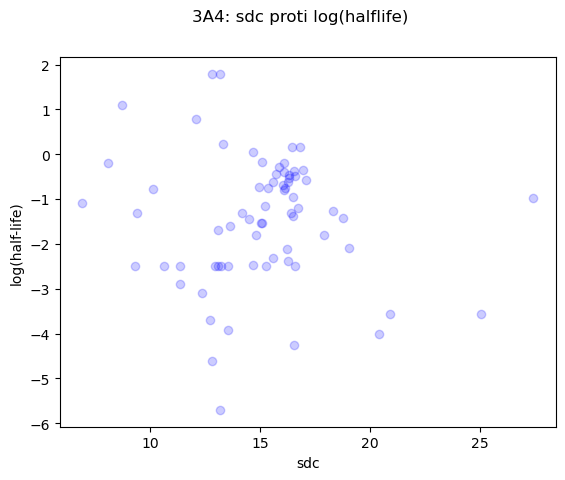

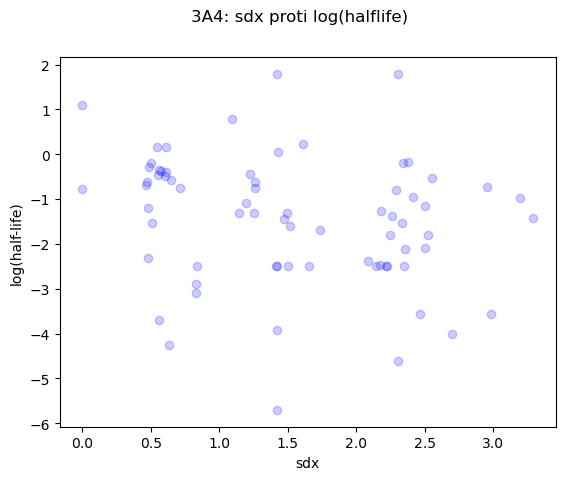

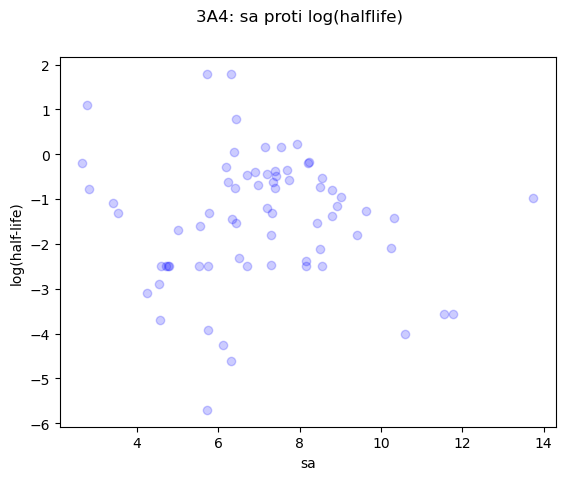

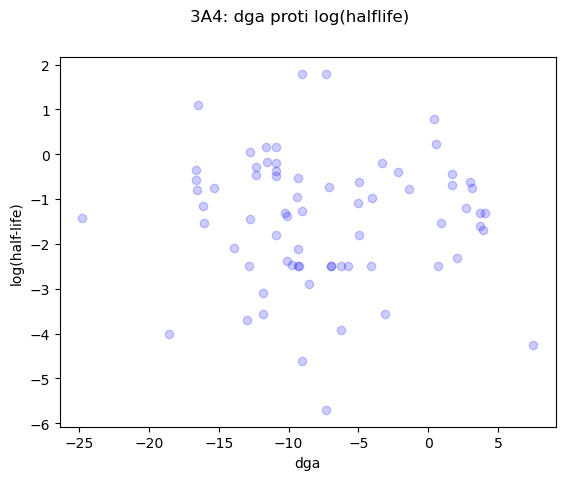

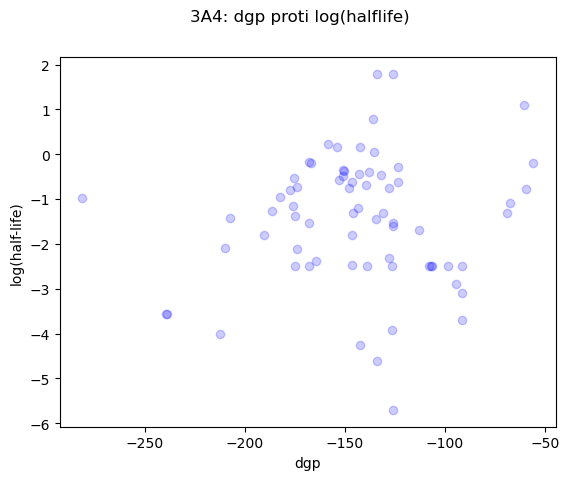

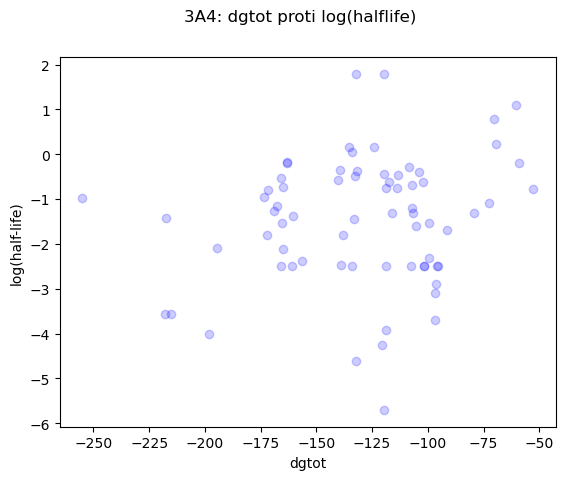

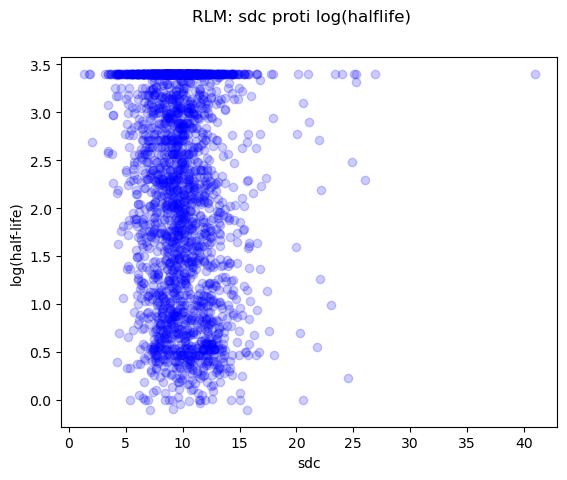

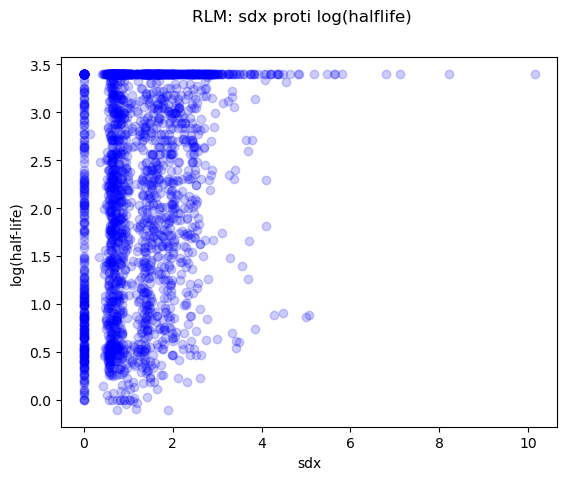

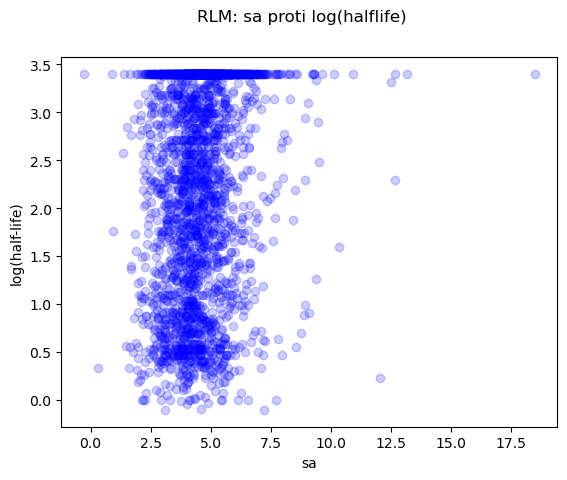

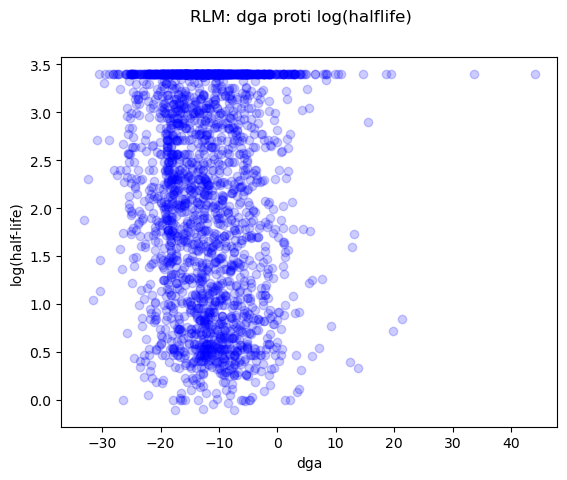

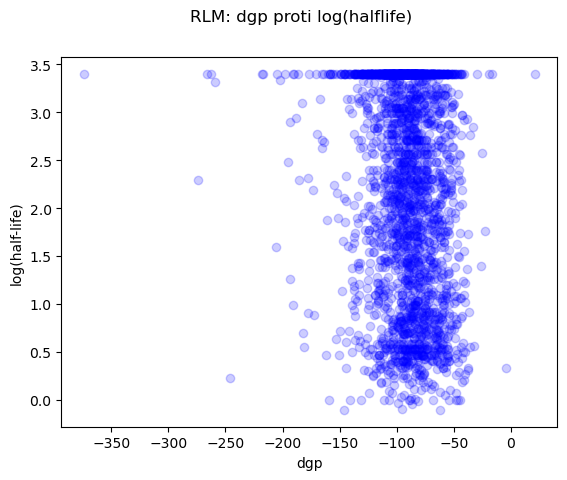

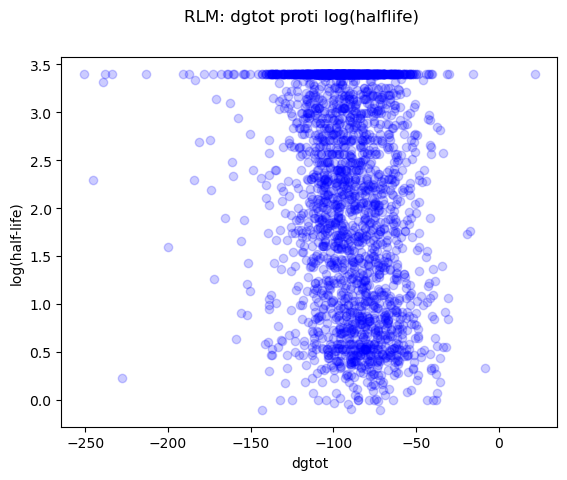

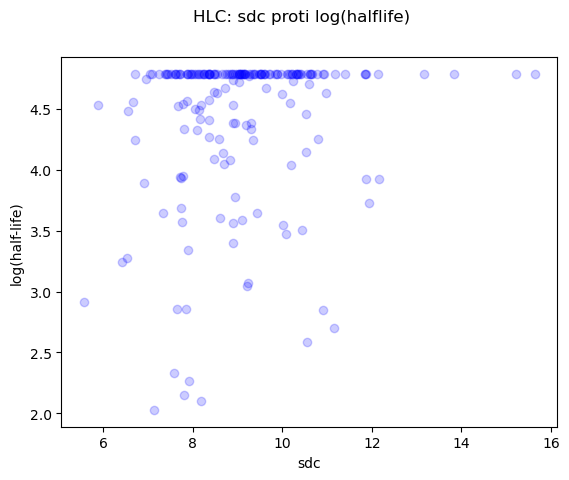

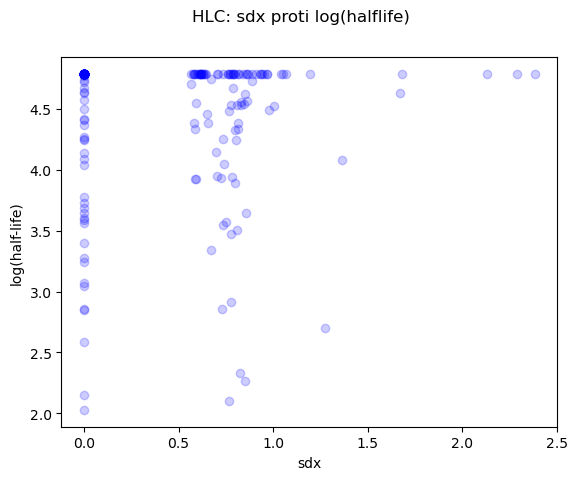

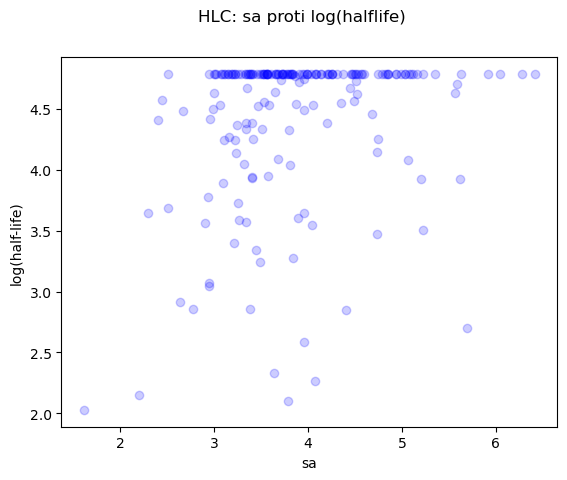

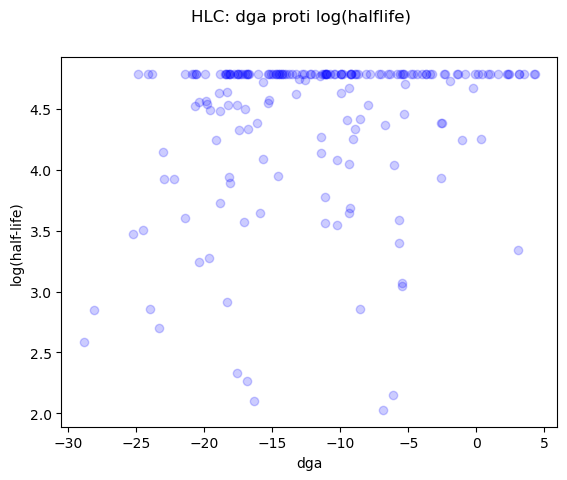

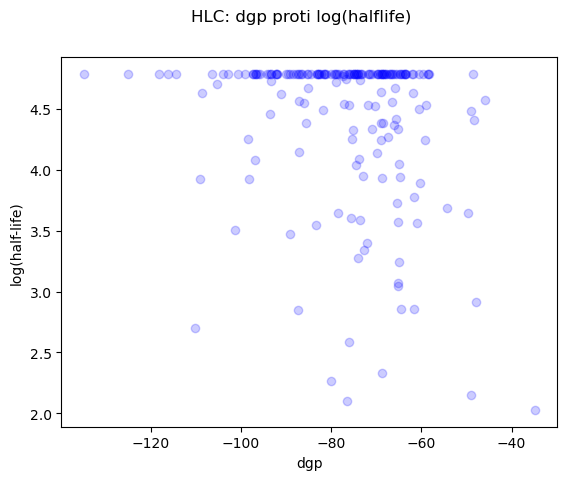

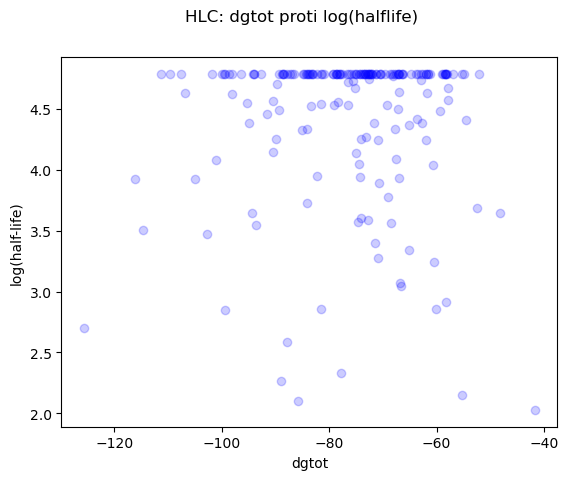

In [34]:
for isozyme in isozymes:
    for feature in mol_features[isozyme][0].keys():
        x = []
        for i in range(len(mol_features[isozyme])):
            x.append(mol_features[isozyme][i][feature])
        y = np.log(np.array(pd.read_csv(abs_file_path(rel_paths[isozyme]))["half-life"]))
        create_scatter_plot(x, y, f"{isozyme}: {feature} proti log(halflife)", feature, "log(half-life)")